Neural and Evolutionary Learning Project

# Exploring the data

## 1. Import libraries

In [4]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load data

In [7]:
! ls

Data_EDA_First_Week.ipynb Data_Preprocessing.ipynb  requirements.txt


In [11]:
import os
data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "sustavianfeed.csv")
data = pd.read_csv(data_path, sep=";")

In [12]:
data.head()

,WING TAG,WEIGHT,HOT CARCASS WEIGHT,CARCASS WEIGHT WITH HEAD AND LEGS,COLD CARCASS WEIGHT,BREAST WEIGHT (2),THIGH WEIGHT (2),SPLEEN,LIVER,HEART,INTESTINE,EMPTY MUSCULAR STOMACH,GLANDULAR STOMACH,CRUDE PROTEIN,ETHER EXTRACT
0,G403,2223.3,1429.6,1725.6,1394.0,214.0,489.4,3.716,38.636,9.305,123.171,/,13.170,86.105469,0.38
1,G439,2201.9,1450.2,1769.8,1405.4,236.0,538.7,3.494,34.725,10.084,71.800,45.273,9.781,86.143472,1.66
2,G454,2159.9,1398.4,1724.9,1461.7,241.8,512.1,4.023,31.932,10.635,61.380,/,6.217,86.416898,0.98
3,G465,2198.7,1473.9,1800.4,1425.1,227.7,549.9,3.087,32.326,11.927,64.879,35.861,8.358,85.959935,1.10
4,G428,2003.2,1291.2,1581.6,1260.1,224.7,473.2,3.723,30.105,9.855,68.562,36.526,7.572,81.693637,6.34


In [4]:
data.tail()

,WING TAG,WEIGHT,HOT CARCASS WEIGHT,CARCASS WEIGHT WITH HEAD AND LEGS,COLD CARCASS WEIGHT,BREAST WEIGHT (2),THIGH WEIGHT (2),SPLEEN,LIVER,HEART,INTESTINE,EMPTY MUSCULAR STOMACH,GLANDULAR STOMACH,CRUDE PROTEIN,ETHER EXTRACT
91,V476,2633.1,1683.2,2034.1,1637.2,213.8,610.9,4.777,45.992,12.796,74.888,54.021,7.857,88.999126,1.07
92,V454,2346.2,1547.8,1819.5,1511.2,228.0,528.2,3.673,35.090,11.504,68.455,42.173,7.837,88.507288,1.13
93,V425,2648.2,1722.9,2050.0,1669.8,253.1,610.0,5.176,50.505,17.194,81.502,49.7,7.332,90.375587,1.91
94,V490,2262.6,1498.5,1813.9,1468.0,212.1,548.4,2.829,30.266,11.129,53.011,46.816,5.425,91.211353,2.21
95,V428,2704.3,1698.8,2038.8,1655.6,245.7,606.9,5.960,40.922,16.190,72.783,75.767,7.420,88.825045,1.51


In [5]:
data.columns

Index(['WING TAG', 'WEIGHT', 'HOT CARCASS WEIGHT',
       'CARCASS WEIGHT WITH HEAD AND LEGS', 'COLD CARCASS WEIGHT',
       'BREAST WEIGHT (2)', 'THIGH WEIGHT (2)', 'SPLEEN', 'LIVER', 'HEART',
       'INTESTINE', 'EMPTY MUSCULAR STOMACH', 'GLANDULAR STOMACH',
       'CRUDE PROTEIN', 'ETHER EXTRACT'],
      dtype='object')

In [180]:
data.shape

(96, 15)

> Metadata

![Captura de ecrã 2025-05-03 192341.png](<attachment:Captura de ecrã 2025-05-03 192341.png>)
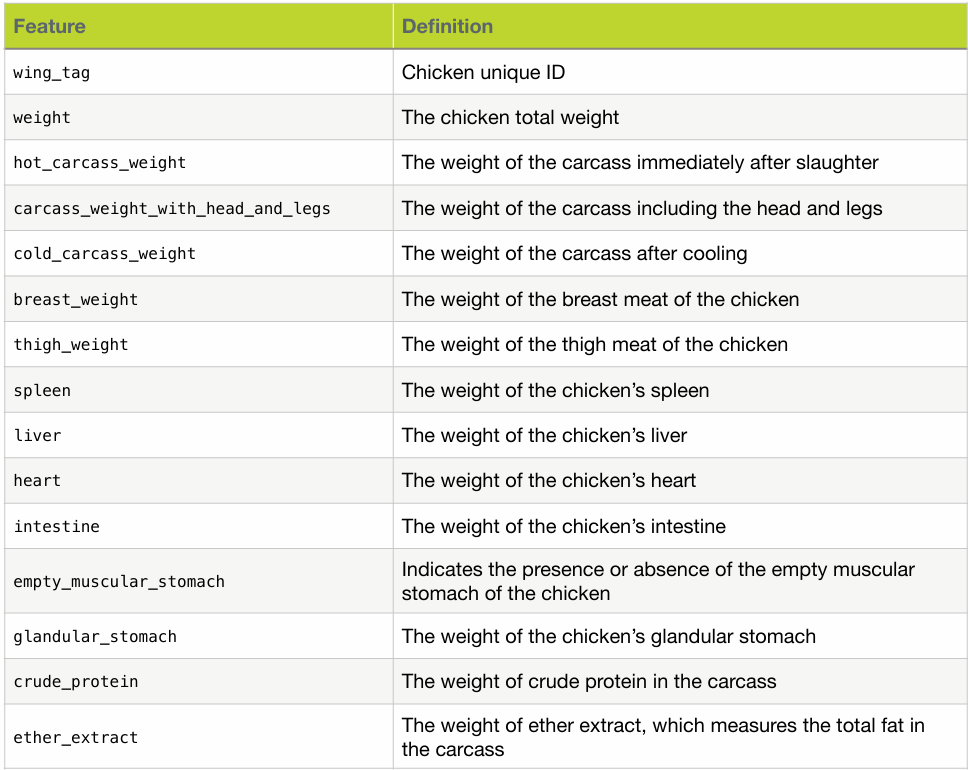

## 3. Statistics

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   WING TAG                           96 non-null     object 
 1   WEIGHT                             96 non-null     float64
 2   HOT CARCASS WEIGHT                 96 non-null     float64
 3   CARCASS WEIGHT WITH HEAD AND LEGS  96 non-null     float64
 4   COLD CARCASS WEIGHT                96 non-null     float64
 5   BREAST WEIGHT (2)                  96 non-null     float64
 6   THIGH WEIGHT (2)                   96 non-null     float64
 7   SPLEEN                             96 non-null     float64
 8   LIVER                              96 non-null     float64
 9   HEART                              96 non-null     float64
 10  INTESTINE                          96 non-null     float64
 11  EMPTY MUSCULAR STOMACH             96 non-null     object 
 

In [7]:
data.dtypes

WING TAG                              object
WEIGHT                               float64
HOT CARCASS WEIGHT                   float64
CARCASS WEIGHT WITH HEAD AND LEGS    float64
COLD CARCASS WEIGHT                  float64
BREAST WEIGHT (2)                    float64
THIGH WEIGHT (2)                     float64
SPLEEN                               float64
LIVER                                float64
HEART                                float64
INTESTINE                            float64
EMPTY MUSCULAR STOMACH                object
GLANDULAR STOMACH                    float64
CRUDE PROTEIN                        float64
ETHER EXTRACT                        float64
dtype: object

> 'EMPTY MUSCULAR STOMACH' should be a boolean variable, as suggested in the metadata.

- It is not a binary variable: Error in data or metadata.

- For now, given this variable is composed of mostly numbers, we will change the type to float and analyse it before deciding on what to do with this variable.

In [8]:
data['EMPTY MUSCULAR STOMACH'].unique() #It is not a binary variable

array(['/', '45.273', '35.861', '36.526', '40.993', '40.949', '45.323',
       '42.091', '49.148', '46.807', '31.103', '49.057', '39.621',
       '43.128', '53.485', '38.836', '44.487', '47.665', '50.006',
       '43.695', '59.547', '61.306', '61.702', '60.063', '45.428',
       '53.456', '43.586', '49.648', '63.571', '47.523', '63.86',
       '64.538', '42.852', '50.119', '32.665', '35.164', '46.656',
       '44.855', '44.962', '51.851', '45.507', '50.136', '43.821',
       '66.616', '29.712', '40.936', '52.518', '35.408', '51.944',
       '41.483', '56.23', '55.663', '42.66', '32.12', '43.964', '75.767',
       '45.327', '42.129', '47.964', '44.811', '32.599', '32.947',
       '38.155', '48.009', '56.347', '59.583', '51.322', '58.708',
       '41.917', '40.425', '51.903', '56.698', '40.7', '45.321', '55.671',
       '68.602', '44.006', '54.71', '45.636', '34.692', '48.933',
       '45.045', '48.02', '42.632', '45.366', '52.457', '49.281',
       '54.021', '42.173', '49.7', '46.816'],

In [9]:
list(data['EMPTY MUSCULAR STOMACH']).count('/')

5

In [10]:
data.describe()

,WEIGHT,HOT CARCASS WEIGHT,CARCASS WEIGHT WITH HEAD AND LEGS,COLD CARCASS WEIGHT,BREAST WEIGHT (2),THIGH WEIGHT (2),SPLEEN,LIVER,HEART,INTESTINE,GLANDULAR STOMACH,CRUDE PROTEIN,ETHER EXTRACT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2339.682292,1521.955208,1833.378125,1481.479167,234.116667,542.205208,4.219917,36.781427,12.059240,69.149156,8.184677,87.313708,2.090417
std,200.943424,144.126939,154.000550,142.830115,37.818405,60.994468,0.998836,5.438894,1.932239,11.727467,1.697425,2.043895,1.351645
min,1968.400000,1284.900000,1554.400000,1252.600000,177.100000,177.800000,2.464000,25.916000,8.561000,44.133000,5.425000,73.837184,0.320000
25%,2201.775000,1425.775000,1723.800000,1380.825000,218.775000,508.225000,3.534250,33.053000,10.584250,62.274250,7.012750,86.544416,1.130000
50%,2299.500000,1493.050000,1809.400000,1452.800000,231.550000,538.100000,4.048000,35.936000,11.679000,68.019500,7.809500,87.574947,1.710000
75%,2473.800000,1608.400000,1922.725000,1573.700000,243.275000,573.850000,4.817000,40.485000,13.449750,75.103000,9.016750,88.508026,2.527500
max,2890.500000,1929.400000,2262.800000,1891.700000,533.200000,690.600000,7.758000,53.133000,17.194000,123.171000,13.170000,91.211353,6.680000


In [15]:
data.columns

Index(['WING TAG', 'WEIGHT', 'HOT CARCASS WEIGHT',
       'CARCASS WEIGHT WITH HEAD AND LEGS', 'COLD CARCASS WEIGHT',
       'BREAST WEIGHT (2)', 'THIGH WEIGHT (2)', 'SPLEEN', 'LIVER', 'HEART',
       'INTESTINE', 'EMPTY MUSCULAR STOMACH', 'GLANDULAR STOMACH',
       'CRUDE PROTEIN', 'ETHER EXTRACT'],
      dtype='object')

In [ ]:
data['EMPTY MUSCULAR STOMACH'].value_counts()

array(['G403', 'G439', 'G454', 'G465', 'G428', 'G424', 'G422', 'G480',
       'G436', 'G489', 'G461', 'G494', 'R407', 'R471', 'R497', 'R448',
       'R442', 'R460', 'R429', 'R478', 'R463', 'R191', 'R466', 'R434',
       'B453', 'B477', 'B466', 'B422', 'B417', 'B411', 'B463', 'B429',
       'B410', 'B402', 'B495', 'B444', 'V406', 'V462', 'V439', 'V410',
       'V437', 'V432', 'V459', 'V453', 'V458', 'V483', 'V420', 'V480',
       'G487', 'G473', 'G460', 'G448', 'G421', 'G468', 'A631', 'G493',
       'G474', 'G423', 'A470', 'G415', 'R445', 'R433', 'R431', 'R449',
       'R469', 'R476', 'R275', 'R427', 'R479', 'R464', 'R421', 'R462',
       'B474', 'B465', 'B469', 'B425', 'B483', 'B427', 'B497', 'B486',
       'B438', 'B493', 'B461', 'B401', 'V419', 'V445', 'V465', 'V418',
       'V436', 'V442', 'V403', 'V476', 'V454', 'V425', 'V490', 'V428'],
      dtype=object)

In [ ]:
def feature_engineering(data, manual_row_removal=False):
    y = data['CRUDE PROTEIN'] 
    X = data.drop(columns=['CRUDE PROTEIN', 'WING TAG', 'EMPTY MUSCULAR STOMACH'])
    
    if isinstance(manual_row_removal, list):
        for row in manual_row_removal:
            X = X.drop(row)
            y = y.drop(row)

    return X, y



def preprocess_data(X, y):
    return X, y

X_fe, y_fe = feature_engineering(data, manual_row_removal=[0, 1, 2, 3, 4])

X_over, y_over = preprocess_data(X_fe, y_fe)